In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
dataset = pd.DataFrame(data=boston.data,columns=boston.feature_names)
labels = pd.DataFrame(data=boston.target,columns=['MEDV'])

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
labels.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
def two_var_scatter(independent_variable,dependent_variable="MEDV"):
    if dependent_variable == "MEDV":
        plt.scatter(dataset[independent_variable],labels[dependent_variable])
    else:
        plt.scatter(dataset[independent_variable],dataset[dependent_variable])
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    
    

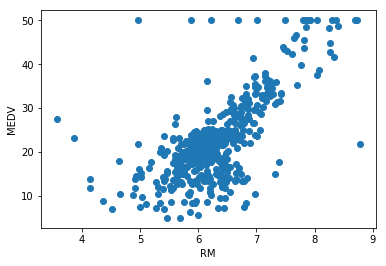

In [10]:
two_var_scatter("RM")

In [11]:
x, y = dataset[["LSTAT"]],np.array(labels["MEDV"])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
model_LinReg = LinearRegression()

In [14]:
model_LinReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_predict = model_LinReg.predict(x_test)

In [16]:
#Aukash "Kash" Sudhakar's hany data visualizer
def _value_to_category(value):
    """ Helper function to convert numerical values between -1.0 and 1.0 to discretized categories. """
    _categorical_types, _value_ranges_test = ["- (S)", "- (M)", "- (W)", "0", "+ (W)", "+ (M)", "+ (S)"], [-1.0, -0.7, -0.4, -0.1, 0.1, 0.4, 0.7, 1.0]
    # Iterates through value ranges and checks if value falls within specific range
    for index in range(len(_value_ranges_test) - 1):
        if float(value) >= _value_ranges_test[index] and float(value) < _value_ranges_test[index + 1]:
            return _categorical_types[index]

def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

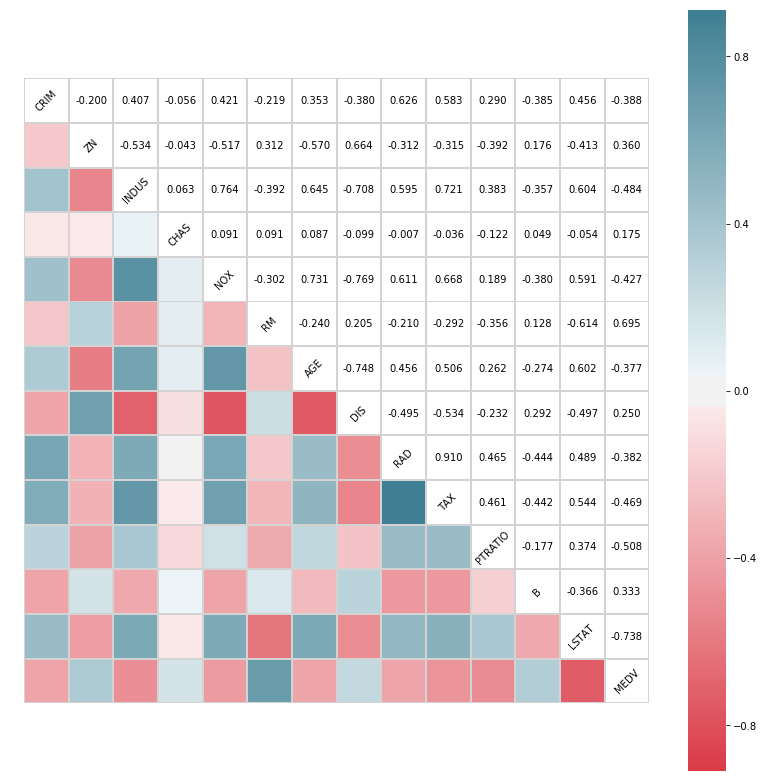

In [17]:
df = pd.concat([dataset, labels], axis=1)

corrplot_(df, fontsize=12)

In [18]:
MSE, RSq = mean_squared_error(y_test,y_predict),r2_score(y_test,y_predict)

In [19]:
MSE, RSq

(30.188096295745414, 0.5428242066028783)

In [20]:
accuracy = model_LinReg.score(x_test,y_test)

In [21]:
print("We're certain... well, we're {:.2f}% certain, at least!".format(100*accuracy))

We're certain... well, we're 54.28% certain, at least!


In [22]:
weights, initial_condition = model_LinReg.coef_,model_LinReg.intercept_

In [23]:
print("MODEL: y(x) = {:.2f}X + {:.2f}".format(weights[0],initial_condition))

MODEL: y(x) = -0.96X + 34.68


In [24]:
independent_var = "LSTAT"

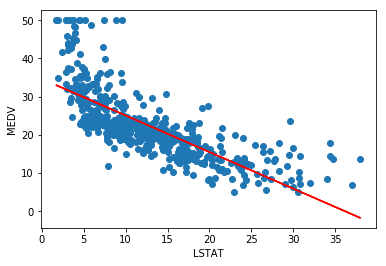

In [25]:
two_var_scatter(independent_var)
y_fit = weights[0] * dataset[independent_var] + initial_condition
plt.plot(dataset[independent_var],y_fit,c="r")

In [32]:
g_accuracy = 0
for i in range(100):
    x,y = dataset[["LSTAT","RM"]],np.array(labels["MEDV"])
    x_train,x_test,y_train,y_test = train_test_split(x,y)
    past_regression = LinearRegression()
    past_regression.fit(x_train,y_train)
    y_predict = past_regression.predict(x_test)
    accuracy = past_regression.score(x_test,y_test)
    g_accuracy += accuracy

In [33]:
print("We're certain. Well, {:.2f}% certain, anyway".format(g_accuracy))

We're certain. Well, 62.05% certain, anyway


In [ ]:
take_it_all = 0
for i in range(100):
    x,y = dataset[["LSTAT","RM"]],np.array(labels["MEDV"])
    x_train,x_test,y_train,y_test = train_test_split(x,y)
    past_regression = LinearRegression()
    past_regression.fit(x_train,y_train)
    y_predict = past_regression.predict(x_test)
    accuracy = past_regression.score(x_test,y_test)
    take_it_all += accuracy